In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [2]:
dataset = "C:/Users/g/OneDrive/Desktop/AIML/project1/House_Rent_Dataset.csv"
#df = pd.read_csv(io.StringIO(dataset) , sep=r'\s+')  # Replace with actual dataset path
df = pd.read_csv(dataset)
df

# Exploratory Data Analysis
#print(df.describe())

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [3]:
def adjust_size(row):
    if row['Area Type'] == 'Super Area':
        return row['Size'] * 0.75
    elif row['Area Type'] == 'Carpet Area':
        return row['Size'] * 1.3
    else:
        return row['Size']
        
df['final_size'] = df.apply(adjust_size, axis=1)

In [4]:
out1 = df[df['final_size'] > 6000].index
out1
df.drop(out1, inplace=True)

In [5]:
ou2 = df[df['Rent'] > 300000].index
ou2
df.drop(ou2, inplace=True)

In [6]:
rep = { 'Ground': 0, 'Lower': 0,'Upper' : 0}
dffloor = df['Floor'].str.split().str[0].replace(rep)
dffloor
df.insert(3,'FL', dffloor)

In [13]:
df

,Posted On,BHK,Rent,FL,Size,Floor,Area Type,Area Locality,City,Furnish 1no 2semi 3ff,TENANT,Tenant Preferred,Bathroom,Point of Contact,final_size
0,2022-05-18,2,10000,0,1100,Ground out of 2,Super Area,Bandel,Kolkata,1,3,Bachelors/Family,2,Contact Owner,825.0
1,2022-05-13,2,20000,1,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,2,3,Bachelors/Family,1,Contact Owner,600.0
2,2022-05-16,2,17000,1,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,2,3,Bachelors/Family,1,Contact Owner,750.0
3,2022-07-04,2,10000,1,800,1 out of 2,Super Area,Dumdum Park,Kolkata,1,3,Bachelors/Family,1,Contact Owner,600.0
4,2022-05-09,2,7500,1,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,1,2,Bachelors,1,Contact Owner,1105.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,3,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,2,3,Bachelors/Family,2,Contact Owner,1300.0
4742,2022-05-15,3,29000,1,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,2,3,Bachelors/Family,3,Contact Owner,1500.0
4743,2022-07-10,3,35000,3,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,2,3,Bachelors/Family,3,Contact Agent,2275.0
4744,2022-07-06,3,45000,23,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,2,1,Family,2,Contact Agent,1950.0


In [11]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
columns_to_encode = ['City', 'Furnishing Status', 'Tenant Preferred','Point of Contact']

In [12]:
encoded_data = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode), index=df.index)

In [9]:
other_cols = df[['BHK', 'FL', 'Bathroom', 'final_size']]
final_df = pd.concat([other_cols, encoded_df], axis=1)

In [13]:
final_df.columns

Index(['BHK', 'FL', 'Bathroom', 'final_size', 'City_Bangalore', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner'],
      dtype='object')

In [14]:
X = final_df[['BHK', 'FL', 'Bathroom', 'final_size', 'City_Bangalore', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished',
       'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors',
       'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Point of Contact_Contact Owner']]# Features
y = df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
# Evaluate model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
y_predr2 = model.predict(X_test)
r2 = r2_score(y_test, y_predr2)
print(f'R² Score: {r2}')

MAE: 15008.461266427816
MSE: 557455827.0794524
RMSE: 23610.50247409937
R² Score: 0.6506108870882894


In [17]:
y_train_pred2 = model.predict(X_train)  # Use the scaled training data

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred2)
r2_train = r2_score(y_train, y_train_pred2)

print(f"Training MSE: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training MSE: 615404465.4995974
Training R-squared: 0.6361742171103654


<Axes: xlabel='FL', ylabel='Rent'>

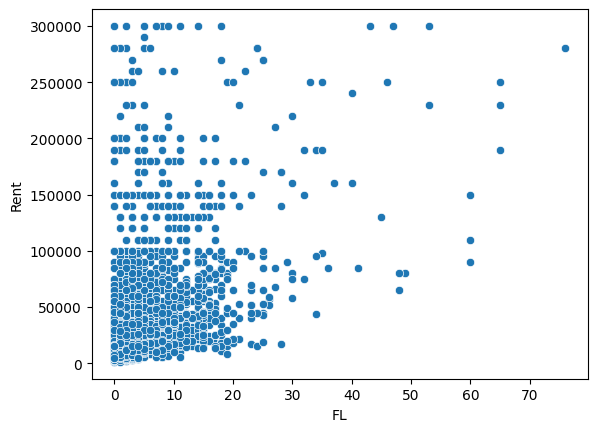

In [20]:
sns.scatterplot(data=df, x="FL", y="Rent")

In [18]:
scaler = StandardScaler()
X_norm_train = scaler.fit_transform(X_train)
X_norm_test = scaler.fit_transform(X_test)

In [19]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(X_norm_train, y_train)
y_pred_sgd = sgdr.predict(X_norm_test)

In [20]:
mae = mean_absolute_error(y_test, y_pred_sgd)
mse = mean_squared_error(y_test, y_pred_sgd)
rmse = np.sqrt(mse)
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
y_predr2 = sgdr.predict(X_norm_test)
r2 = r2_score(y_test, y_predr2)
print(f'R² Score: {r2}')
r2train = r2_score

MAE: 15729.828500035097
MSE: 596527136.218342
RMSE: 24423.90501574926
R² Score: 0.6261226866296902


In [21]:
y_train_pred = sgdr.predict(X_norm_train)  # Use the scaled training data

# Calculate metrics
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Training MSE: {mse_train}")
print(f"Training R-squared: {r2_train}")

Training MSE: 88739966648.70709
Training R-squared: -51.462875473865154
